In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'1 1': 513, '0 0': 511}


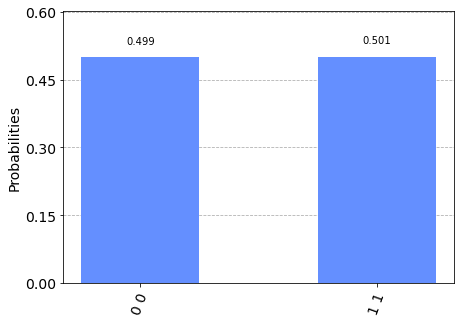

In [2]:
q = QuantumRegister(2)
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
qc = QuantumCircuit(q, c0, c1, name="entanglement_2qubits")

qc.h(q[0])
qc.cx(q[0],q[1])

qc.measure(q[0], c0[0])
qc.measure(q[1], c1[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

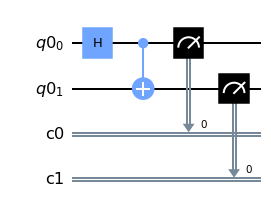

In [3]:
qc.draw(output='mpl')

In [4]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub

In [6]:
result_exp = job_exp.result()
print(result_exp)

Result(backend_name='ibmq_athens', backend_version='1.3.15', qobj_id='366fa36b-a4f0-4921-bdac-102418051443', job_id='6071e45b826b0d63d0cdedfd', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 467, '0x1': 26, '0x2': 19, '0x3': 512}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c1', 0]], creg_sizes=[['c0', 1], ['c1', 1]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='entanglement_2qubits', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), memory=False)], date=2021-04-10 14:46:51-03:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_athens', backend_version='1.3.15'), time_taken=7.88459849357605, execution_id='b712eff4-9a24-11eb-87eb-b02628ea1e00', client_version={'qiskit': '0.25.0'})


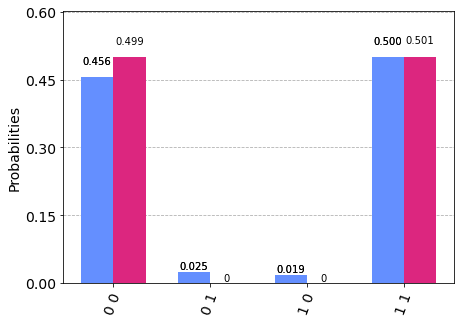

In [7]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [8]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

JOB ID: 6071e45b826b0d63d0cdedfd


In [57]:
#job_get=backend.retrieve_job(jobID)
#job_get.result().get_counts(qc)

In [59]:
api.get_last_codes()

[{'active': True,
  'codeType': 'QASM2',
  'creationDate': '2019-04-29T06:03:16.231Z',
  'deleted': False,
  'displayUrls': {'png': 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_42263efc45184c7ca4742512588a1942/codes/code-5cc693a4a301e0006f49ae0d.png'},
  'executions': [{'calibration': {},
    'codeId': '5cc693a4a301e0006f49ae0d',
    'deleted': False,
    'deviceId': '5ae875650f02050039315d94',
    'deviceRunType': 'sim_trivial_2',
    'endDate': '2019-04-29T06:06:17.127Z',
    'id': '5cc694597419450081ceccaf',
    'ip': {'continent': 'South America',
     'country': 'Brazil',
     'ip': '179.95.222.113'},
    'modificationDate': 1556517977009,
    'paramsCustomize': {'seed': 1329244013},
    'result': {'data': {'additionalData': {'seed': 1329244013},
      'creg_labels': 'c[5]',
      'p': {'labels': ['00110'], 'qubits': [1, 2], 'values': [1]},
      'qasm': 'IBMQASM 2.0;\n\ninclude "qelib1.inc";\nqreg q[5];\ncreg c[5];\n\nh q[1];\nh q[2];\nh q[2];\ncx q[1],q[2];\nh q[2];\nh 